In [1]:
NEURON_LAYER = 256
EPOCH = 200

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.graphics.tsaplots as sgt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('../attributes_dataset/sunshine.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)
df.columns = ['y']
df.head()

,y
date,
2016-01-01,4.1
2016-01-02,8.6
2016-01-03,8.4
2016-01-04,3.3
2016-01-05,3.5


# Convert Dataframe to Array

In [4]:
def df_to_array(df, window_size):
    df_y_np = df.y.to_numpy()
    df_index_np = df.index.to_numpy()
    
    x = []
    y = []
    date = []
    for i in range(len(df_index_np) - window_size):
        row = [[a] for a in df_y_np[i:i+window_size]]
        x.append(row)
        label = df_y_np[i+window_size]
        y.append(label)
        index = df_index_np[i+window_size]
        date.append(index)
        
    return np.array(x), np.array(y), np.array(date)

# Configure Batch Size

In [5]:
WINDOW_SIZE = 128

# Split the Data

In [6]:
train_ratio = int(len(df) * 0.8)
test_ratio = train_ratio + int(len(df) * 0.1)

dtrain, dval, dtest = df.iloc[:train_ratio], df.iloc[(train_ratio - WINDOW_SIZE):test_ratio], df.iloc[(test_ratio - WINDOW_SIZE):]

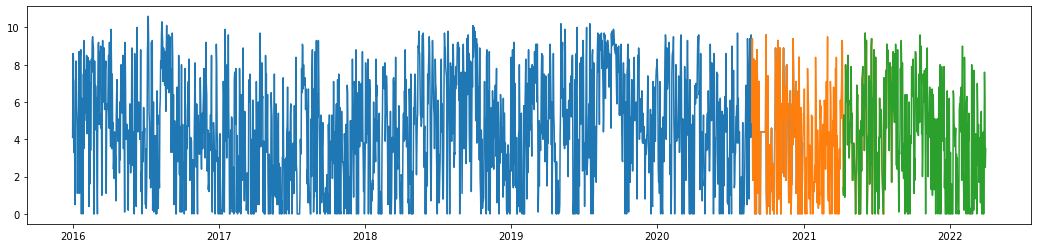

In [7]:
plt.figure(figsize=(18,4))
plt.plot(dtrain)
plt.plot(dval)
plt.plot(dtest)

# Standarization for data train

In [8]:
dev_val = dtrain.std()[0]
mean_val = dtrain.mean()[0]

def make_std(data):
    data_std = data    
    data_std = (data_std-mean_val)/dev_val
    
    return data_std

In [9]:
dtrain_std = make_std(dtrain)

In [10]:
dval_std = make_std(dval)

In [11]:
dtest_std = make_std(dtest)

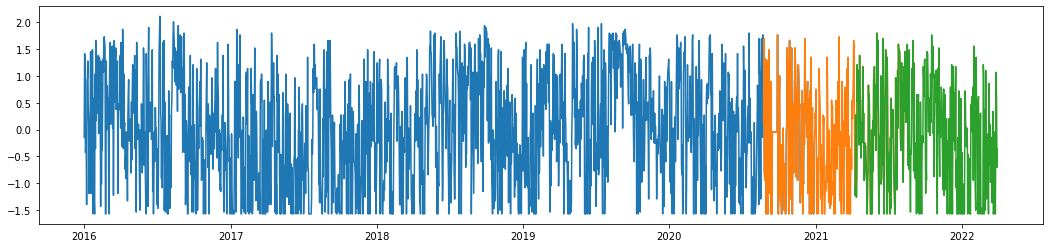

In [12]:
plt.figure(figsize=(18,4))
plt.plot(dtrain_std)
plt.plot(dval_std)
plt.plot(dtest_std)

# De-standarization Function

In [13]:
def de_std(df):
    column = ['Predictions', 'Actuals']
    for index, row in df.iterrows():
        for col in column:
            val = df.loc[index, col]
            df.loc[index, col] = (dev_val * val) + mean_val        

## Get x and y values

In [14]:
X_train, y_train, date_train = df_to_array(dtrain_std, WINDOW_SIZE)
X_val, y_val, date_val = df_to_array(dval_std, WINDOW_SIZE)
X_test, y_test, date_test = df_to_array(dtest_std, WINDOW_SIZE)

# Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE,1)))
model1.add(LSTM(NEURON_LAYER))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 266,257
Trainable params: 266,257
Non-trainable params: 0
_________________________________________________________________


### Saving the Model

In [17]:
cp = ModelCheckpoint('LSTM_models/model_cp/', save_best_only=True)

In [18]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
%%time
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp])

Epoch 1/200
54/54 [==============================] - ETA: 0s - loss: 0.9427 - root_mean_squared_error: 0.9709

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 27s 450ms/step - loss: 0.9427 - root_mean_squared_error: 0.9709 - val_loss: 0.8978 - val_root_mean_squared_error: 0.9475
Epoch 2/200
54/54 [==============================] - ETA: 0s - loss: 0.8979 - root_mean_squared_error: 0.9476

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 23s 427ms/step - loss: 0.8979 - root_mean_squared_error: 0.9476 - val_loss: 0.8797 - val_root_mean_squared_error: 0.9379
Epoch 3/200
54/54 [==============================] - ETA: 0s - loss: 0.8829 - root_mean_squared_error: 0.9396

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 24s 437ms/step - loss: 0.8829 - root_mean_squared_error: 0.9396 - val_loss: 0.8722 - val_root_mean_squared_error: 0.9339
Epoch 4/200
54/54 [==============================] - ETA: 0s - loss: 0.8681 - root_mean_squared_error: 0.9317

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 23s 436ms/step - loss: 0.8681 - root_mean_squared_error: 0.9317 - val_loss: 0.8571 - val_root_mean_squared_error: 0.9258
Epoch 5/200
54/54 [==============================] - ETA: 0s - loss: 0.8537 - root_mean_squared_error: 0.9240

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 24s 441ms/step - loss: 0.8537 - root_mean_squared_error: 0.9240 - val_loss: 0.8466 - val_root_mean_squared_error: 0.9201
Epoch 6/200
54/54 [==============================] - ETA: 0s - loss: 0.8381 - root_mean_squared_error: 0.9155

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 24s 448ms/step - loss: 0.8381 - root_mean_squared_error: 0.9155 - val_loss: 0.8333 - val_root_mean_squared_error: 0.9129
Epoch 7/200
54/54 [==============================] - ETA: 0s - loss: 0.8223 - root_mean_squared_error: 0.9068

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 24s 446ms/step - loss: 0.8223 - root_mean_squared_error: 0.9068 - val_loss: 0.8280 - val_root_mean_squared_error: 0.9100
Epoch 8/200
54/54 [==============================] - 18s 341ms/step - loss: 0.8130 - root_mean_squared_error: 0.9017 - val_loss: 0.8310 - val_root_mean_squared_error: 0.9116
Epoch 9/200
54/54 [==============================] - ETA: 0s - loss: 0.8076 - root_mean_squared_error: 0.8987

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 24s 443ms/step - loss: 0.8076 - root_mean_squared_error: 0.8987 - val_loss: 0.8143 - val_root_mean_squared_error: 0.9024
Epoch 10/200
54/54 [==============================] - ETA: 0s - loss: 0.7995 - root_mean_squared_error: 0.8941

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 22s 411ms/step - loss: 0.7995 - root_mean_squared_error: 0.8941 - val_loss: 0.8083 - val_root_mean_squared_error: 0.8991
Epoch 11/200
54/54 [==============================] - ETA: 0s - loss: 0.8088 - root_mean_squared_error: 0.8993

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 385ms/step - loss: 0.8088 - root_mean_squared_error: 0.8993 - val_loss: 0.8015 - val_root_mean_squared_error: 0.8953
Epoch 12/200
54/54 [==============================] - ETA: 0s - loss: 0.7959 - root_mean_squared_error: 0.8921

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 382ms/step - loss: 0.7959 - root_mean_squared_error: 0.8921 - val_loss: 0.7957 - val_root_mean_squared_error: 0.8920
Epoch 13/200
54/54 [==============================] - 17s 318ms/step - loss: 0.8157 - root_mean_squared_error: 0.9031 - val_loss: 0.8054 - val_root_mean_squared_error: 0.8974
Epoch 14/200
54/54 [==============================] - ETA: 0s - loss: 0.7908 - root_mean_squared_error: 0.8893

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 20s 375ms/step - loss: 0.7908 - root_mean_squared_error: 0.8893 - val_loss: 0.7897 - val_root_mean_squared_error: 0.8887
Epoch 15/200
54/54 [==============================] - ETA: 0s - loss: 0.7875 - root_mean_squared_error: 0.8874

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 387ms/step - loss: 0.7875 - root_mean_squared_error: 0.8874 - val_loss: 0.7833 - val_root_mean_squared_error: 0.8851
Epoch 16/200
54/54 [==============================] - 17s 314ms/step - loss: 0.7885 - root_mean_squared_error: 0.8879 - val_loss: 0.7978 - val_root_mean_squared_error: 0.8932
Epoch 17/200
54/54 [==============================] - 17s 315ms/step - loss: 0.7912 - root_mean_squared_error: 0.8895 - val_loss: 0.7847 - val_root_mean_squared_error: 0.8858
Epoch 18/200
54/54 [==============================] - ETA: 0s - loss: 0.7837 - root_mean_squared_error: 0.8853

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 384ms/step - loss: 0.7837 - root_mean_squared_error: 0.8853 - val_loss: 0.7823 - val_root_mean_squared_error: 0.8845
Epoch 19/200
54/54 [==============================] - ETA: 0s - loss: 0.7885 - root_mean_squared_error: 0.8880

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 393ms/step - loss: 0.7885 - root_mean_squared_error: 0.8880 - val_loss: 0.7790 - val_root_mean_squared_error: 0.8826
Epoch 20/200
54/54 [==============================] - ETA: 0s - loss: 0.7837 - root_mean_squared_error: 0.8853

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 389ms/step - loss: 0.7837 - root_mean_squared_error: 0.8853 - val_loss: 0.7773 - val_root_mean_squared_error: 0.8816
Epoch 21/200
54/54 [==============================] - 17s 322ms/step - loss: 0.7821 - root_mean_squared_error: 0.8844 - val_loss: 0.7805 - val_root_mean_squared_error: 0.8835
Epoch 22/200
54/54 [==============================] - 17s 323ms/step - loss: 0.7825 - root_mean_squared_error: 0.8846 - val_loss: 0.7853 - val_root_mean_squared_error: 0.8861
Epoch 23/200
54/54 [==============================] - 17s 321ms/step - loss: 0.7802 - root_mean_squared_error: 0.8833 - val_loss: 0.7775 - val_root_mean_squared_error: 0.8817
Epoch 24/200
54/54 [==============================] - 17s 320ms/step - loss: 0.7810 - root_mean_squared_error: 0.8837 - val_loss: 0.7832 - val_root_mean_squared_error: 0.8850
Epoch 25/200
54/54 [==============================] - ETA: 0s - loss: 0.7820 - root_mean_squared_error: 0.8843

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 397ms/step - loss: 0.7820 - root_mean_squared_error: 0.8843 - val_loss: 0.7768 - val_root_mean_squared_error: 0.8814
Epoch 26/200
54/54 [==============================] - ETA: 0s - loss: 0.7823 - root_mean_squared_error: 0.8845

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 22s 406ms/step - loss: 0.7823 - root_mean_squared_error: 0.8845 - val_loss: 0.7708 - val_root_mean_squared_error: 0.8780
Epoch 27/200
54/54 [==============================] - 17s 314ms/step - loss: 0.7786 - root_mean_squared_error: 0.8824 - val_loss: 0.7744 - val_root_mean_squared_error: 0.8800
Epoch 28/200
54/54 [==============================] - 17s 318ms/step - loss: 0.7750 - root_mean_squared_error: 0.8803 - val_loss: 0.7727 - val_root_mean_squared_error: 0.8790
Epoch 29/200
54/54 [==============================] - 17s 313ms/step - loss: 0.7767 - root_mean_squared_error: 0.8813 - val_loss: 0.7725 - val_root_mean_squared_error: 0.8789
Epoch 30/200
54/54 [==============================] - 16s 304ms/step - loss: 0.7729 - root_mean_squared_error: 0.8792 - val_loss: 0.7756 - val_root_mean_squared_error: 0.8807
Epoch 31/200
54/54 [==============================] - 16s 303ms/step - loss: 0.7696 - root_mean_squared_error: 0.8773 - val_loss: 0.7783 -

Epoch 73/200
54/54 [==============================] - 16s 304ms/step - loss: 0.7600 - root_mean_squared_error: 0.8718 - val_loss: 0.7835 - val_root_mean_squared_error: 0.8851
Epoch 74/200
54/54 [==============================] - 16s 305ms/step - loss: 0.7663 - root_mean_squared_error: 0.8754 - val_loss: 0.7973 - val_root_mean_squared_error: 0.8929
Epoch 75/200
54/54 [==============================] - 16s 303ms/step - loss: 0.7545 - root_mean_squared_error: 0.8686 - val_loss: 0.7834 - val_root_mean_squared_error: 0.8851
Epoch 76/200
54/54 [==============================] - 17s 307ms/step - loss: 0.7520 - root_mean_squared_error: 0.8672 - val_loss: 0.7907 - val_root_mean_squared_error: 0.8892
Epoch 77/200
54/54 [==============================] - 17s 307ms/step - loss: 0.7511 - root_mean_squared_error: 0.8667 - val_loss: 0.7895 - val_root_mean_squared_error: 0.8885
Epoch 78/200
54/54 [==============================] - 17s 306ms/step - loss: 0.7510 - root_mean_squared_error: 0.8666 - val_l

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


54/54 [==============================] - 21s 391ms/step - loss: 0.7614 - root_mean_squared_error: 0.8726 - val_loss: 0.7660 - val_root_mean_squared_error: 0.8752
Epoch 98/200
54/54 [==============================] - 17s 319ms/step - loss: 0.7518 - root_mean_squared_error: 0.8671 - val_loss: 0.7827 - val_root_mean_squared_error: 0.8847
Epoch 99/200
54/54 [==============================] - 18s 328ms/step - loss: 0.7461 - root_mean_squared_error: 0.8638 - val_loss: 0.7867 - val_root_mean_squared_error: 0.8870
Epoch 100/200
54/54 [==============================] - 17s 318ms/step - loss: 0.7414 - root_mean_squared_error: 0.8610 - val_loss: 0.8032 - val_root_mean_squared_error: 0.8962
Epoch 101/200
54/54 [==============================] - 17s 317ms/step - loss: 0.7406 - root_mean_squared_error: 0.8606 - val_loss: 0.7897 - val_root_mean_squared_error: 0.8886
Epoch 102/200
54/54 [==============================] - 17s 314ms/step - loss: 0.7483 - root_mean_squared_error: 0.8651 - val_loss: 0.780

Epoch 144/200
54/54 [==============================] - 17s 314ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428 - val_loss: 0.8234 - val_root_mean_squared_error: 0.9074
Epoch 145/200
54/54 [==============================] - 17s 313ms/step - loss: 0.7053 - root_mean_squared_error: 0.8398 - val_loss: 0.8359 - val_root_mean_squared_error: 0.9142
Epoch 146/200
54/54 [==============================] - 17s 318ms/step - loss: 0.7046 - root_mean_squared_error: 0.8394 - val_loss: 0.8725 - val_root_mean_squared_error: 0.9341
Epoch 147/200
54/54 [==============================] - 18s 330ms/step - loss: 0.7080 - root_mean_squared_error: 0.8414 - val_loss: 0.8263 - val_root_mean_squared_error: 0.9090
Epoch 148/200
54/54 [==============================] - 17s 312ms/step - loss: 0.7210 - root_mean_squared_error: 0.8491 - val_loss: 0.8600 - val_root_mean_squared_error: 0.9273
Epoch 149/200
54/54 [==============================] - 16s 306ms/step - loss: 0.7025 - root_mean_squared_error: 0.8382 -

# Load the Model

## Train Results

In [20]:
train_prediction = model1.predict(X_train).flatten()
train_result = pd.DataFrame(data={'date': date_train,'Predictions': train_prediction, 'Actuals': y_train})
train_result.Predictions = round(train_result.Predictions, 2)
train_result.set_index('date', inplace=True)

In [21]:
de_std(train_result)

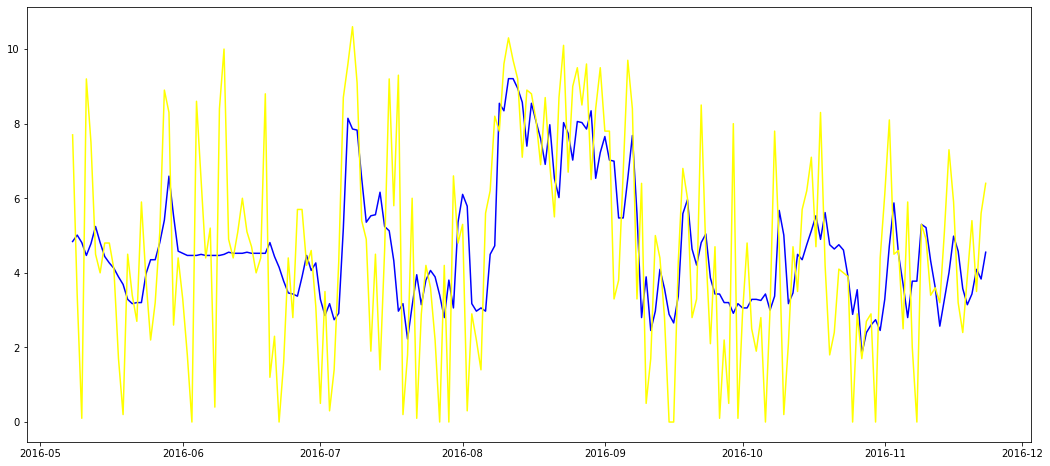

In [22]:
plt.figure(figsize=(18,8))
plt.plot(train_result['Predictions'][:200], color='blue')
plt.plot(train_result['Actuals'][:200], color='yellow')
plt.show()

In [23]:
train_MAE = mean_absolute_error(train_result['Actuals'], train_result['Predictions'])
train_RMSE = sqrt(mean_squared_error(train_result['Actuals'], train_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {train_MAE}')
print(f'Root Mean Squared Error is\t: {train_RMSE}')

Mean Absolute Error is		: 1.8456063592000815
Root Mean Squared Error is	: 2.269980359075266


## Validation Results

In [24]:
val_prediction = model1.predict(X_val).flatten()
val_result = pd.DataFrame(data={'date': date_val, 'Predictions': val_prediction, 'Actuals': y_val})
val_result.set_index('date', inplace=True)
# val_result.Predictions = round(train_result.Predictions, 2)

In [25]:
de_std(val_result)

In [26]:
val_result

,Predictions,Actuals
date,,
2020-12-30,3.676737,4.4
2020-12-31,4.494686,5.4
2021-01-01,5.259977,5.1
2021-01-02,5.022711,6.7
2021-01-03,5.220315,3.6
...,...,...
2021-08-10,4.981132,7.9
2021-08-11,6.015614,5.5
2021-08-12,4.951681,8.7


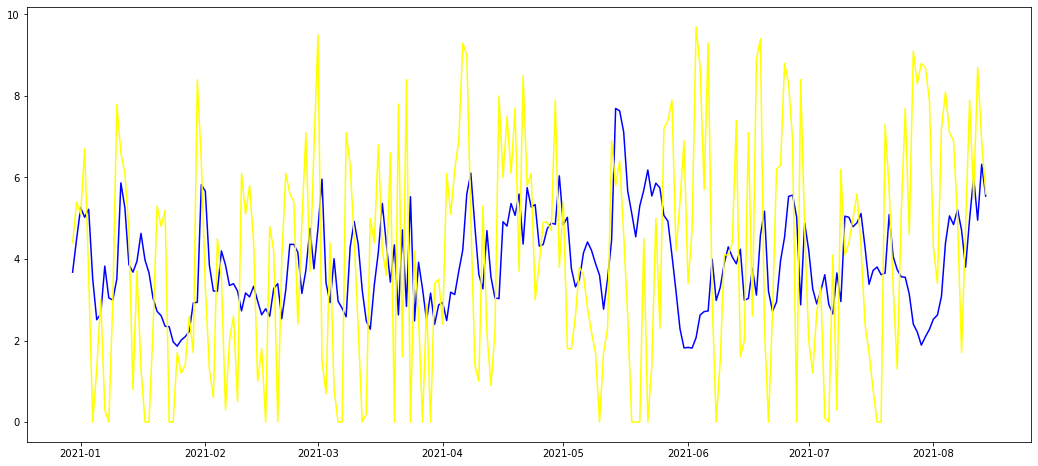

In [27]:
plt.figure(figsize=(18,8))
plt.plot(val_result['Predictions'], color='blue')
plt.plot(val_result['Actuals'], color='yellow')
plt.show()

In [28]:
val_MAE = mean_absolute_error(val_result['Actuals'], val_result['Predictions'])
val_RMSE = sqrt(mean_squared_error(val_result['Actuals'], val_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {val_MAE}')
print(f'Root Mean Squared Error is\t: {val_RMSE}')

Mean Absolute Error is		: 2.366278022736834
Root Mean Squared Error is	: 2.872498713583882


## Test Results

In [29]:
test_prediction = model1.predict(X_test).flatten()
test_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_prediction, 'Actuals': y_test})
test_result.set_index('date', inplace=True)
# test_result.Predictions = round(train_result.Predictions, 2)

In [30]:
de_std(test_result)

In [31]:
test_result

,Predictions,Actuals
date,,
2021-08-15,4.960722,4.9
2021-08-16,4.531053,8.6
2021-08-17,5.862164,5.2
2021-08-18,4.686174,9.1
2021-08-19,6.023512,6.1
...,...,...
2022-03-27,2.449852,3.3
2022-03-28,2.706345,7.6
2022-03-29,4.284306,6.2


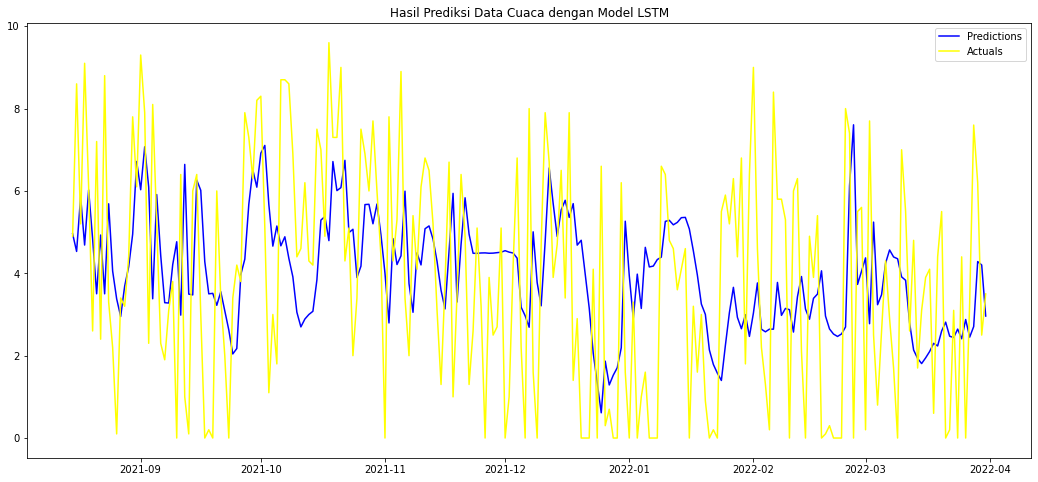

In [32]:
plt.figure(figsize=(18,8))
plt.title("Hasil Prediksi Data Cuaca dengan Model LSTM")
plt.plot(test_result['Predictions'], color='blue')
plt.plot(test_result['Actuals'], color='yellow')
plt.legend(['Predictions', 'Actuals'])
plt.show()
# plt.savefig('max_temp_LSTM.png')

In [33]:
test_MAE = mean_absolute_error(test_result['Actuals'], test_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_result['Actuals'], test_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 2.304132296476822
Root Mean Squared Error is	: 2.743895730270443


# LSTM forecast

In [34]:
def one_step_forecast(model, X):
    X_val = np.array(X)
    result = model.predict(X_val).flatten()
    X_val_update = []
    
    for lags in X_val:
        lags_update = []
        
        for value in lags:
            lags_update.append(value)
        
        lags_update.append(result)
        lags_update = lags_update[1:]
        
        X_val_update.append(lags_update)
    
    
    return result, np.array(X_val_update)

In [35]:
def LSTM_forecast(model, period, lags):
    lags = [lags]
    final_result = []
    iteration = 0
    while iteration < period:
        result, lags = one_step_forecast(model, lags)
        final_result.append(result[0])
        iteration += 1
    return np.array(final_result), lags

In [36]:
X_start_test = X_test[0]

In [37]:
result, X_next = LSTM_forecast(model1, period=len(X_test), lags=X_start_test)

In [38]:
test_forecast_prediction = result
test_forecast_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_forecast_prediction, 'Actuals': y_test})
test_forecast_result.set_index('date', inplace=True)

In [39]:
de_std(test_forecast_result)

In [40]:
test_forecast_result

,Predictions,Actuals
date,,
2021-08-15,4.960721,4.9
2021-08-16,4.553660,8.6
2021-08-17,4.329262,5.2
2021-08-18,4.149214,9.1
2021-08-19,4.019157,6.1
...,...,...
2022-03-27,3.605899,3.3
2022-03-28,3.573839,7.6
2022-03-29,3.539092,6.2


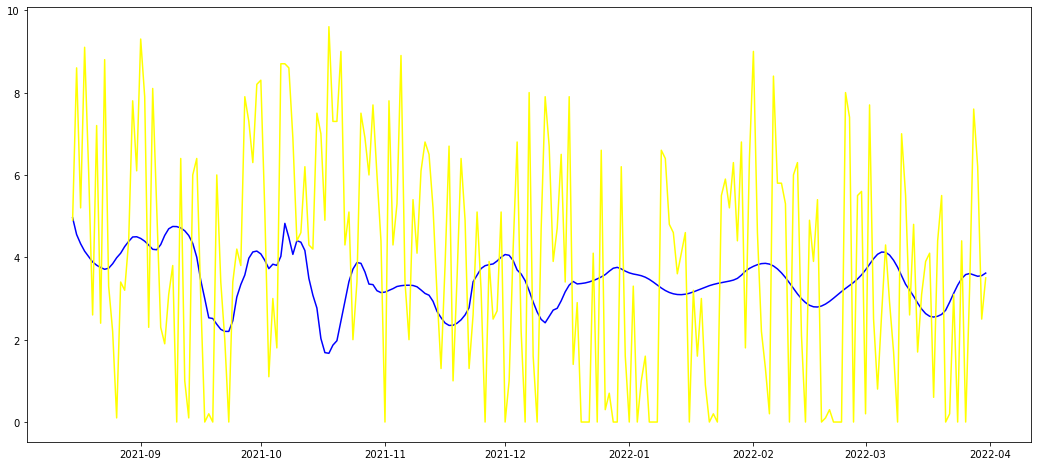

In [41]:
plt.figure(figsize=(18,8))
plt.plot(test_forecast_result['Predictions'], color='blue')
plt.plot(test_forecast_result['Actuals'], color='yellow')
plt.show()

In [42]:
test_MAE = mean_absolute_error(test_forecast_result['Actuals'], test_forecast_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_forecast_result['Actuals'], test_forecast_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 2.4261035275771627
Root Mean Squared Error is	: 2.818814759871842


# Plot Final Result

In [43]:
get_update_res = test_result.copy()
get_update_res.columns = ['Predictions_update', 'Actuals']
final_result = pd.concat([get_update_res, test_forecast_result[['Predictions']]], axis='columns')

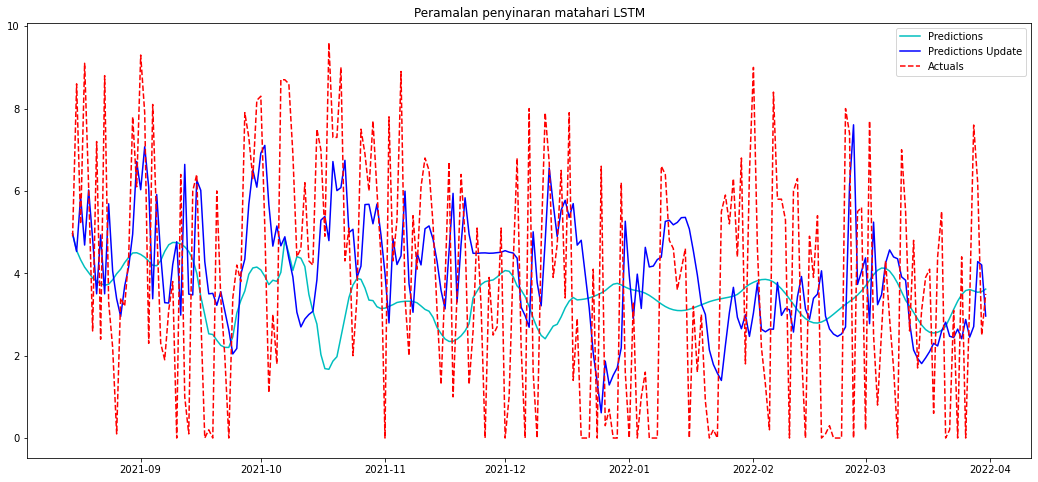

In [44]:
plt.figure(figsize=(18,8))
plt.title('Peramalan penyinaran matahari LSTM')
plt.plot(final_result['Predictions'], 'c-',  label='Predictions')
plt.plot(final_result['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(final_result['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [45]:
print("Predictions Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 2.4261035275771627
Root Mean Squared Error is	: 2.818814759871842


In [46]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 2.304132296476822
Root Mean Squared Error is	: 2.743895730270443


In [47]:
final_result.to_csv('LSTM_results_temp/sun_n'+str(NEURON_LAYER)+'_e'+str(EPOCH)+'.csv')

# Best Result

In [3]:
df_best = pd.read_csv('LSTM_results_temp/sun_n128_e100.csv')
df_best.date = pd.to_datetime(df_best.date, format='%Y-%m-%d')
df_best.set_index('date', inplace=True)
df_best.head()

,Predictions_update,Actuals,Predictions
date,,,
2021-08-15,4.937664,4.9,4.937662
2021-08-16,4.534779,8.6,4.550561
2021-08-17,6.059457,5.2,4.308459
2021-08-18,4.750753,9.1,4.159695
2021-08-19,6.412973,6.1,4.072808


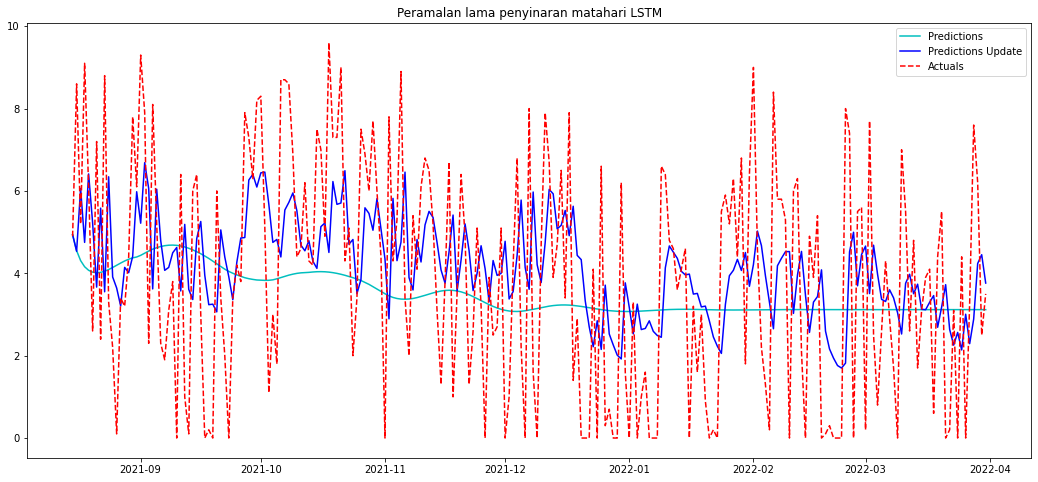

In [4]:
plt.figure(figsize=(18,8))
plt.title('Peramalan lama penyinaran matahari LSTM')
plt.plot(df_best['Predictions'], 'c-',  label='Predictions')
plt.plot(df_best['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(df_best['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [5]:
print("Predictions Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 2.3208568122270745
Root Mean Squared Error is	: 2.706839207332802


In [6]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 2.224719052838428
Root Mean Squared Error is	: 2.6294026634361236
